# **DATA ANALYTICS IN CRICKET**

---



---



TEAM MEMBERS

1.   CB.EN.U4CSE19011 - BARATHI BABU M
2.   CB.EN.U4CSE19013 - CHINTALA ROHIT KRISHNA SAI
3.   CB.EN.U4CSE19048 - RANJITH KUMAR S





**Abstarct**

Data science helps us to extract knowledge or insights from data- either structured or unstructured- by using scientific methods like mathematical or statistical models. A lot of other applications like image recognition, gaming, or Airline route planning also involves the usage of big data and data science. Now the application of data science is used sports like football and cricket is widely becoming popular, as popular as the national teams and the club/franchise teams started hiring the data analysts or tying with the top data science companies to analyse their team’s and individual player’s performance by their records. The term is popularly called as sports analysis.

Sports Analytics is all about analysing and extracting useful insights from sports data using data science and machine learning principles and techniques. Sports analytics is classified into two types Descriptive Sports Analytics and Predictive Sports Analytics. Cricket is a sport where data science and machine learning have scope to dive into quite a large outlet. It can go a long way towards suggesting optimal strategies and predicting match outcomes for a team to win a match or a franchise to bid a valuable player. The number of matches played every season across various formats has increased and so has the data, the algorithms, newer sports data analysis technologies and simulation models.
 
Cricket data analysis necessitates team analysis, field and stadium conditions, player monitoring, ball tracking, player vs player analysis, and batsman vs bowler analysis, therefore the need of data scientist can be extremely beneficial to the team. It can help solve any chanciness attached to a batsman or a bowler’s performance in a given condition. With the use of various statistical tools and trained machine learning models, the probability of a particular player’s performance can be assessed under specific conditions. Applying machine learning is crucial to take impulse and guesswork out of the equation in critical situations of LOSS/WIN. Data analytics can help a team to decide “Which batsman should bat first for a super-over?” or “Which bowler from the team should bowl the last over?” or “Which batsmen have a greater probability to bat under given weather conditions against a right-handed bowler?”. The machine learning models to assess a player’s performance are trained by taking multiple factors into account such as the opposing team’s strengths and weaknesses, the pitch information, ground information, weather conditions, and more. Predicting or classifying any future events helps the captain make the right decision on and off the field.


**Problem defination**

Use the dataset from Indian Premier League(IPL) to analyse each match, teams, players, stadiums ,toss etc to describe, summarize, visualize and explore to find the relationship between the columns and variables and finally to predict using the patterns of the previous records in the given datasets  


1.IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2.Load Dataset

In [ ]:
df = pd.read_csv('/content/matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Under Standing of dataset**

The dataset has <b>18 columns</b>. Let's get acquainted with the columns.
* <b>id</b>: The IPL match id.
* <b>season</b>: The IPL season
* <b>city</b>: The city where the IPL match was held.
* <b>date</b>: The date on which the match was held.
* <b>team1</b>: One of the teams of the IPL match
* <b>team2</b>: The other team of the IPL match
* <b>toss_winner</b>: The team that won the toss
* <b>toss_decision</b>: The decision taken by the team that won the toss to 'bat' or 'field' 
* <b>result</b>: The result('normal', 'tie', 'no result') of the match.
* <b>dl_applied</b>: (1 or 0)indicates whether Duckworth-Lewis rule was applied or not.
* <b>winner</b>: The winner of the match.
* <b>win_by_runs</b>: Provides the runs by which the team batting first won
* <b>win_by_runs</b>: Provides the number of wickets by which the team batting second won.
* <b>player_of_match</b>: The outstanding player of the match.
* <b>venue</b>: The venue where the match was hosted.
* <b>umpire1</b>: One of the two on-field umpires who officiate the match.
* <b>umpire2</b>: One of the two on-field umpires who officiate the match.
* <b>umpire3</b>: The off-field umpire who officiates the match

#EDA

In [ ]:
df.shape

(756, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2016-05-01,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,C Shamshuddin
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


**4.Handling the missing values**

In [ ]:
#4.1. count of missing values in the dataset
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


From the observation in 4.1
* columns like "city", "winner", "player_of_match", "umpire1", "umpire2" have missing values.
* In Column "umpire3" there are more missing values in the dataset,so we should drop the column from the dataset



In [ ]:
#4.2.Droping Umpire 3 column
df.drop(["umpire3"],axis=1,inplace=True)

In [ ]:
#4.3.find the venue name of all missing value "city"
df[df["city"].isnull()][["city","venue"]]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


From 4.3,
we observe that the matches played with name of the city is missing,it can be filled from the venue because all the missing values are played at " Dubai International Cricket Stadium" from the venue name we get the City name "Dubai"

In [ ]:
#4.4. As all missing values are from "Dubai International Cricket Stadium". 
#So we can fill the missing value by "Dubai" using fillna()
df["city"] = df["city"].fillna("Dubai")

In [ ]:
df.loc[(df['city'] == 'Dubai')]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,Dubai,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,Dubai,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,Dubai,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,Dubai,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,Dubai,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,Dubai,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,Dubai,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [ ]:
#4.5.Handling Missing Values in "umpire1", "umpire2", "player_of_match" columns
df[(df["umpire1"].isnull()) | (df["umpire2"].isnull()) | (df["player_of_match"].isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [ ]:
# 4.5.1.Delete rows where the columns 'umpire1', 'umpire2', and 'player of match' have no value.
df.dropna(subset=['umpire1', 'umpire2', 'player_of_match'],inplace=True)

**Plotting the number of matches playes each season**

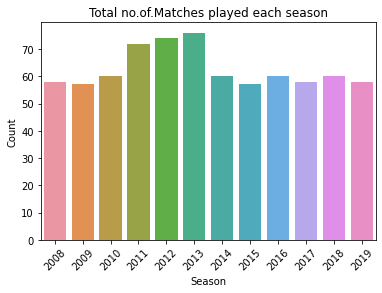

In [ ]:
sns.countplot(df['season'])
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Total no.of.Matches played each season')
plt.show()

from the graph we infer that most no of matches are played in IPL-2013 season i.e, 70+ matches and least no of matches are played in IPL-2009 and 2015 season i.e, around 55 matches

**The count of number of toss winners using barplot**

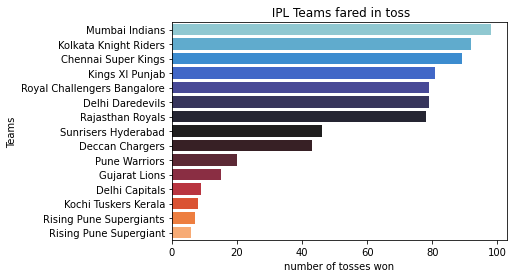

In [ ]:
plt.title(" IPL Teams fared in toss")
toss=df['toss_winner'].value_counts()
sns.barplot(y=toss.index, x=toss, orient='h',palette="icefire",saturation=1)
plt.xlabel('number of tosses won')
plt.ylabel('Teams')
plt.show()

We infer that most number of Toss winner is Mumbai indians more than 90+ matches and least number of toss winner is Rising Pune supergiant(also to note that RPSG played for only 2 seasons of IPL as the Temporary replacement of Chennai Super Kings)

**Matches Played by each team**

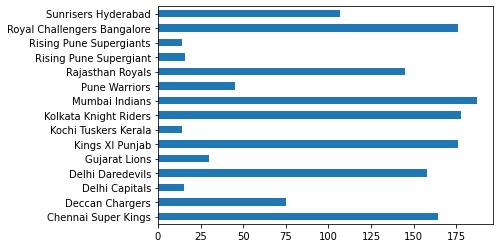

In [ ]:
x = df['team1'].value_counts()
y = df['team2'].value_counts()
(x+y).plot(kind='barh')

Mumbai Indians played most of the matches among all other teams and Rising Pune Supergaints played the least matches

**Most Wins in IPL**


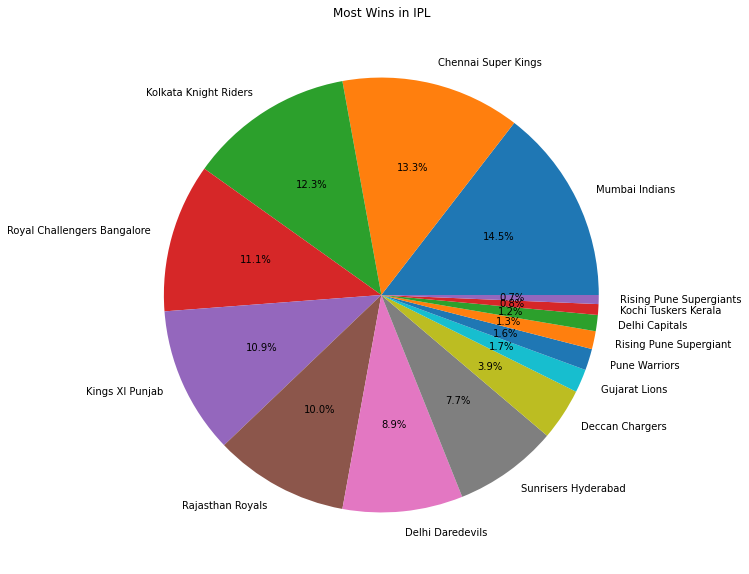

In [ ]:
wins = pd.DataFrame({"Winner":df['winner']})
count_wins = wins.value_counts()


labels = [x[0] for x in count_wins.keys()]

bar,ax = plt.subplots(figsize=(12,10))
ax = plt.pie(x = count_wins,autopct ="%.1f%%" ,labels=labels,)
plt.title("Most Wins in IPL" )
plt.show()

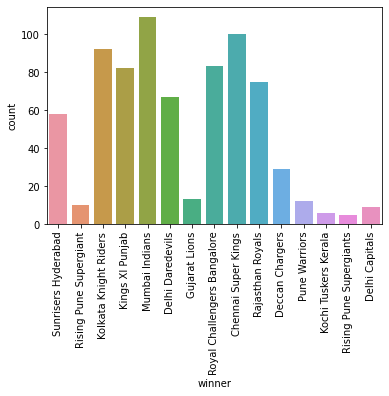

In [ ]:
sns.countplot('winner', data=df)
plt.xticks(rotation='vertical')
plt.show()

Mumbai indians wins more IPL matches from 2008-2019 compared to other teams

**Toss Dession By Teams** 

In [ ]:
teams = df['toss_winner'].unique()
descion_making = pd.DataFrame([],columns = ['Toss Winner','Decision','Times'])
for id ,element in enumerate(teams):
  bat = df[(df['toss_winner'] == element) & (df['toss_decision'] == 'bat')]
  field = df[(df['toss_winner'] == element) & (df['toss_decision'] == 'field')]
#append to decision making
  descion_making = descion_making.append({'Toss Winner':element,
                                          'Decision':'bat','Times':bat['toss_winner'].count()},ignore_index= True)
  descion_making = descion_making.append({'Toss Winner':element,
                                          'Decision':'field','Times':field['toss_winner'].count()},ignore_index= True)

In [ ]:
descion_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,19
1,Royal Challengers Bangalore,field,60
2,Rising Pune Supergiant,bat,0
3,Rising Pune Supergiant,field,6
4,Kolkata Knight Riders,bat,30
5,Kolkata Knight Riders,field,62
6,Kings XI Punjab,bat,26
7,Kings XI Punjab,field,55
8,Sunrisers Hyderabad,bat,20
9,Sunrisers Hyderabad,field,26


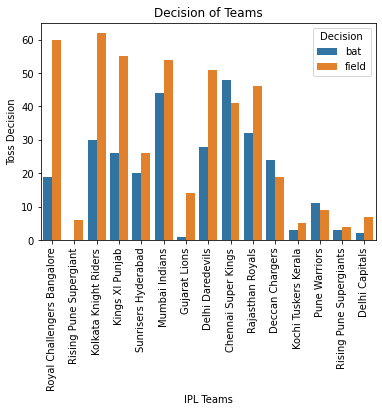

In [ ]:
sns.barplot(x="Toss Winner",y="Times",hue='Decision',data=descion_making,)
plt.xticks(rotation=90)
plt.title("Decision of Teams")
plt.xlabel("IPL Teams")
plt.ylabel("Toss Decision")
plt.show()

Most of the teams choose to field after winning the toss exact chennai super king they used to choose bat if they own


**Toss Decision in each season**

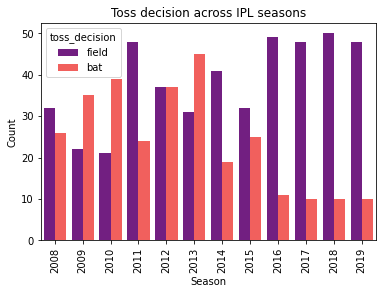

In [ ]:
sns.countplot(x='season', hue='toss_decision', data=df,palette="magma",saturation=1)
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Toss decision across IPL seasons')
plt.show()

we infer that in seasons except 2009,2010 and 2013 the majority of toss winners choose to field first.

Only In IPL-2012,toss decision is Equal both fielding and batting

**To check whether the toss winners are the match winners**

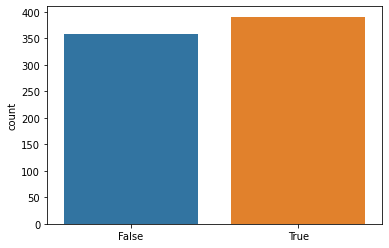

In [ ]:
toss = df['toss_winner'] == df['winner']
sns.countplot(toss)
plt.show()

it is true that majority of the toss winners are match winners in overall IPL season

**Venue**

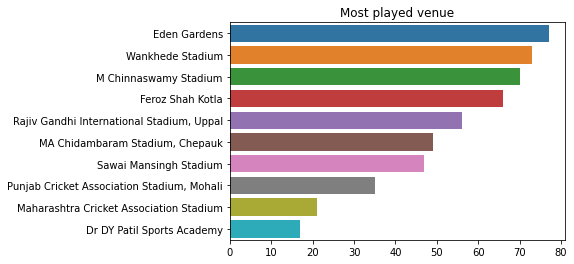

In [ ]:

sns.barplot(x=df['venue'].value_counts().head(10).values,
            y = df['venue'].value_counts().head(10).index)

plt.title('Most played venue')
plt.show()

Among top 10 venues Eden Gradens is the most played venue

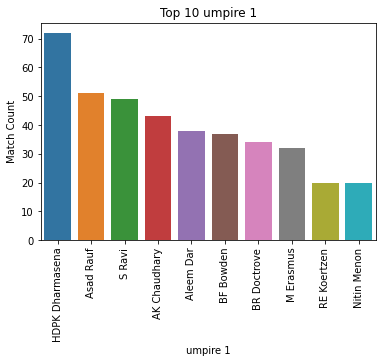

In [ ]:
sns.barplot(x=df['umpire1'].value_counts().head(10).index,
            y = df['umpire1'].value_counts().head(10).values)

plt.xlabel("umpire 1")
plt.ylabel("Match Count")
plt.xticks(rotation = 90)
plt.title("Top 10 umpire 1")
plt.show()

HDPK Dharasena played most of the matches as umpire1

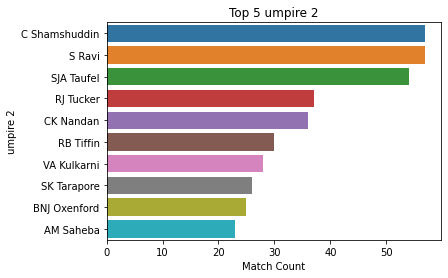

In [ ]:
sns.barplot(x=df['umpire2'].value_counts().head(10).values,
            y = df['umpire2'].value_counts().head(10).index)

plt.ylabel("umpire 2")
plt.xlabel("Match Count")
plt.title("Top 5 umpire 2")
plt.show()

C Shamshuddin and S Ravi played most of the matches as umpire 2

In [ ]:
umpire1_ser = df['umpire1'].value_counts()
umpire2_ser = df['umpire2'].value_counts()

In [ ]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,72.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
K Srinivasan,NaN,2.0
Subroto Das,NaN,1.0


In [ ]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True)

In [ ]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,86.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
59,SJA Taufel,55.0


S. Ravi has officiated the most number of IPL matches on-field, followed by former SriLankan international cricketer HDPK Dharmasena.

**Top 5 players with the highest number of Man of the Match awards**

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
Name: player_of_match, dtype: int64


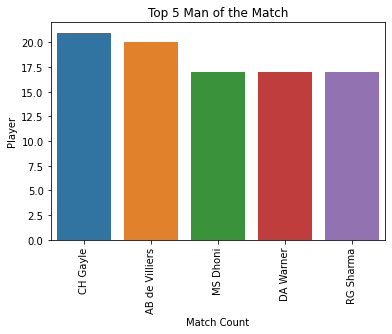

In [ ]:
data=df['player_of_match'].value_counts().head()
print(data)
sns.barplot(x=data.index,y=data.values,data=df)
plt.title("Top 5 Man of the Match")
plt.xticks(rotation=90)
plt.xlabel("Match Count")
plt.ylabel("Player")
plt.show()

CH Gayle has more number of man of matches form 2008-2019

In [ ]:
toss_ser = df['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [ ]:
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,79
5,Delhi Daredevils,79
6,Rajasthan Royals,78
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


Mumbai Indians has won the most toss(till 2019) in IPL history.

In [ ]:
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Ahmedabad          12
Centurion          12
Visakhapatnam      12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Dubai               7
Cape Town           7
Abu Dhabi           7
Cuttack             7
Port Elizabeth      7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
city_ser = df['city'].value_counts()

city_df = pd.DataFrame(columns=['city', 'matches'])
for items in city_ser.iteritems():
    temp_df6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df = city_df.append(temp_df6, ignore_index=True)

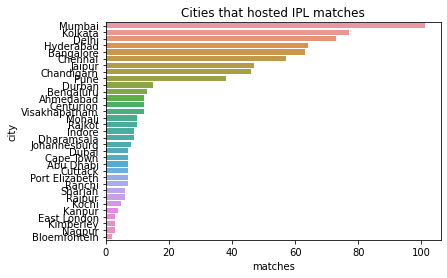

In [ ]:
plt.title("Cities that hosted IPL matches")
sns.barplot(x='matches', y='city', data=city_df);

Mumbai has hosted the maximum number of IPL matches.

**If we have a look at features balance we can see we have relatively balanced dataset.**

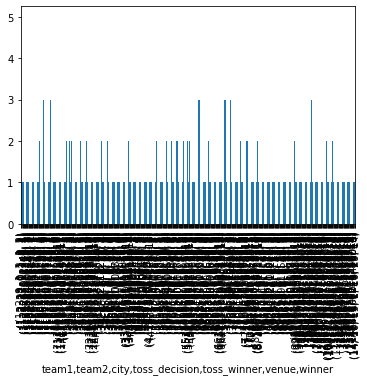

In [ ]:
df[['team1','team2','city','toss_decision','toss_winner','venue','winner']].value_counts().sort_index().plot.bar()

# OutLier Detection And Scaling

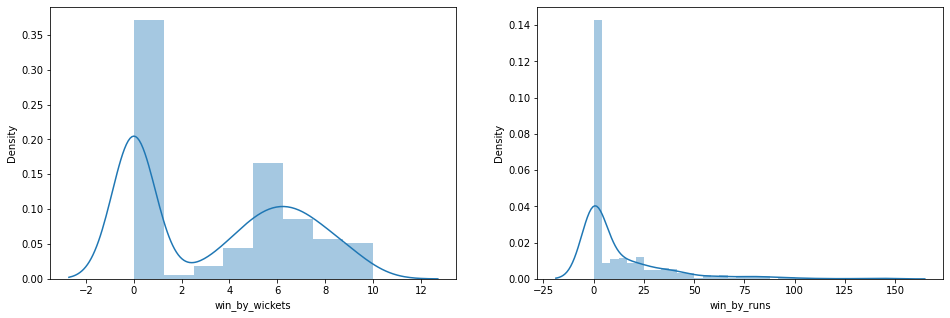

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['win_by_wickets'])
plt.subplot(1,2,2)
sns.distplot(df['win_by_runs'])
plt.show()

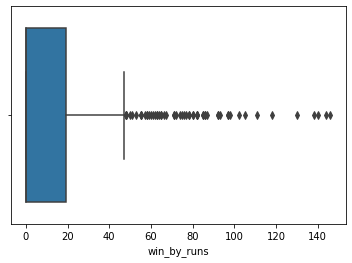

In [ ]:
sns.boxplot(df['win_by_runs'])

In [ ]:
percentile25 = df['win_by_runs'].quantile(0.25)
percentile75 = df['win_by_runs'].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
df[df['win_by_runs'] > upper_limit]
df[df['win_by_runs'] < lower_limit]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [ ]:
new_df = df[df['win_by_runs'] < upper_limit]
new_df.shape

(692, 17)

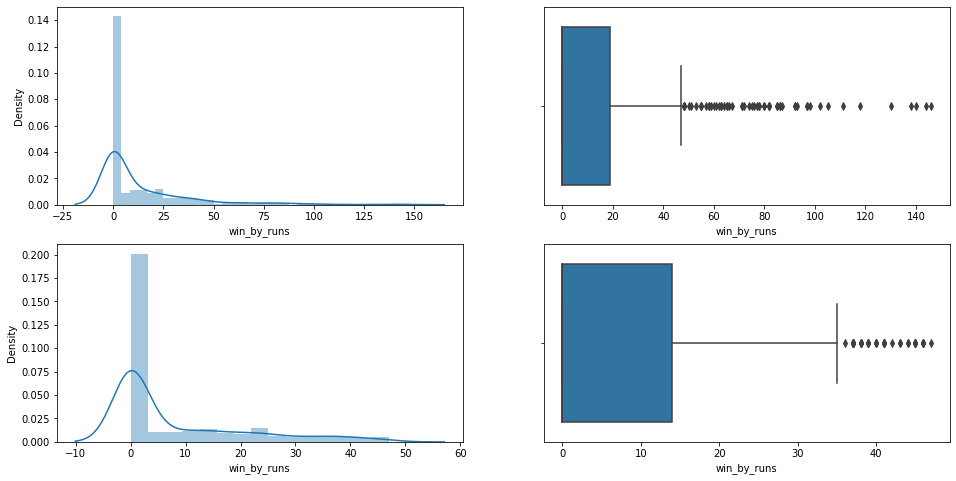

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['win_by_runs'])
plt.subplot(2,2,2)
sns.boxplot(df['win_by_runs'])
plt.subplot(2,2,3)
sns.distplot(new_df['win_by_runs'])
plt.subplot(2,2,4)
sns.boxplot(new_df['win_by_runs'])
plt.show()

Capping

In [ ]:
new_df_cap = df.copy()
new_df_cap['win_by_runs'] = np.where(
    new_df_cap['win_by_runs'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['win_by_runs'] < lower_limit,
        lower_limit,
        new_df_cap['win_by_runs']
    )
)

Comparing the plots after capping

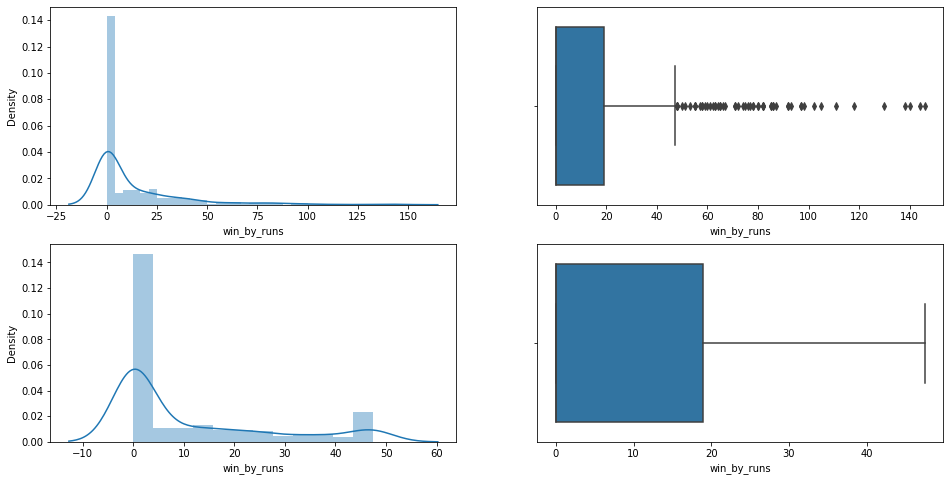

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['win_by_runs'])
plt.subplot(2,2,2)
sns.boxplot(df['win_by_runs'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['win_by_runs'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['win_by_runs'])
plt.show()

In [ ]:
team_encodings= {
    'Mumbai Indians' : 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
}

team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'winner': team_encodings
                   }

df.replace(team_encode_dict, inplace=True)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,8,10,10,field,normal,0,10,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city','toss_decision','venue']
encoder = LabelEncoder()
for ftr in ftr_list:
  df[ftr] = encoder.fit_transform(df[ftr])
  print(encoder.classes_)

df

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,15,2017-04-05,10,3,3,1,normal,0,10,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong
1,2,2017,27,2017-04-06,1,11,11,1,normal,0,11,0,7,SPD Smith,21,A Nand Kishore,S Ravi
2,3,2017,29,2017-04-07,8,2,2,1,normal,0,2,0,10,CA Lynn,31,Nitin Menon,CK Nandan
3,4,2017,16,2017-04-08,11,9,9,1,normal,0,9,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin
5,6,2017,15,2017-04-09,8,10,10,1,normal,0,10,0,9,Rashid Khan,28,A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,23,05/05/19,5,9,9,1,normal,0,9,0,6,KL Rahul,14,KN Ananthapadmanabhan,C Shamshuddin
751,11347,2019,24,05/05/19,2,1,1,1,normal,0,1,0,9,HH Pandya,40,Nanda Kishore,O Nandan
752,11412,2019,8,07/05/19,5,1,5,0,normal,0,1,0,6,AS Yadav,18,Nigel Llong,Nitin Menon
754,11414,2019,32,10/05/19,14,5,5,1,normal,0,5,0,6,F du Plessis,0,Sundaram Ravi,Bruce Oxenford


**Taking Redundant Column**

In [ ]:
match_df = df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
5,8,10,15,1,10,28,10


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city','toss_decision','venue']
encoder = LabelEncoder()
for ftr in ftr_list:
  match_df[ftr] = encoder.fit_transform(match_df[ftr])
  print(encoder.classes_)

match_df

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
5,8,10,15,1,10,28,10
...,...,...,...,...,...,...,...
750,5,9,23,1,9,14,9
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
754,14,5,32,1,5,0,5


**Test and Train Split**

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(match_df,test_size = 0.2,random_state = 5)
print(train.shape)
print(test.shape)

(600, 7)
(150, 7)


# Models And Accuracy Scores

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def print_model_scores(model,data,predictor,target):
  model.fit(data[predictor],data[target])
  predictions = model.predict(data[predictor])
  accuracy = accuracy_score(predictions,data[target])
  print('Accuracy: %s' % '{0:.2}'.format(accuracy))
  scores = cross_val_score(model,data[predictor],data[target],
                           scoring ="neg_mean_squared_error", cv=5 )
  print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
  print(f"Average RMSE: {np.sqrt(-scores).mean()}")

**Checking Accuracy for Logistic Regression**

In [ ]:
target_var=['winner']
predictor_var = ['team1','team2','venue', 'toss_winner', 'city', 'toss_decision']
model = LogisticRegression()
print_model_scores(model, train, predictor_var, target_var)

Accuracy: 0.32
Cross-Validation Score :[3.37762244 3.40220517 3.3763886  2.77788889 3.21584618]
Average RMSE: 3.2299902554284814


**Checking Accuracy for Random Forest Classifier**

In [ ]:
model = RandomForestClassifier(n_estimators=100)
target_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
print_model_scores(model, train,predictor_var, target_var)

Accuracy: 0.9
Cross-Validation Score :[2.99722094 3.33791352 3.97387301 3.07544035 3.24550972]
Average RMSE: 3.3259915054544087


**Match Prediction**

In [ ]:
team1='Royal Challengers Bangalore'
team2='Chennai Super Kings'
toss_winner='Chennai Super Kings'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")



[['3' '5' '14' '5' '2' '1']]
The winner would be: Royal Challengers Bangalore


**Feature Importance**

---



In [ ]:
pd.Series(index= predictor_var, data=model.feature_importances_)

team1            0.230657
team2            0.235888
venue            0.172406
toss_winner      0.176827
city             0.153804
toss_decision    0.030418
dtype: float64

# Predictions of RCB vs CSk Based on different venues

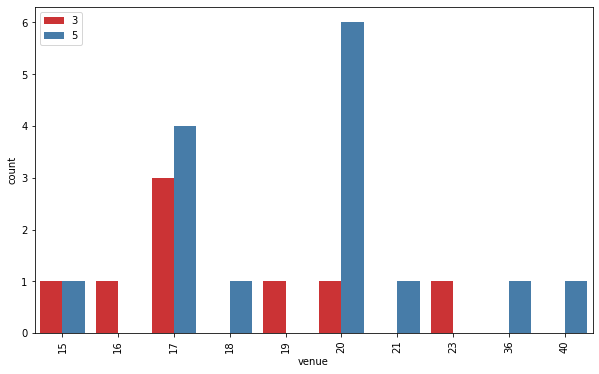

In [ ]:
import seaborn as sns
team1=team_encodings['Royal Challengers Bangalore']
team2=team_encodings['Chennai Super Kings']
mtemp=match_df[((match_df['team1']==team1)|(match_df['team2']==team1))&((match_df['team1']==team2)|(match_df['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp, palette='Set1')
plt.xticks(rotation='vertical')
leg = plt.legend( loc = 'upper left')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#Conclusion

* **Mumbai Indians is the most successful team in IPL**.
* **Mumbai Indians has won the most number of toss**.
* **The Mumbai city has hosted the most number of IPL matches**.
* **Chris Gayle has won the maximum number of player of the match title**.
* **Winning toss gives a slight edge(52% probability of winning) against the opponents**.
* **Five indian players have figured in the top ten IPL players list**.
* **S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field**.
* **Eden Gardens has hosted the maximum number of IPL matches**.
* **Till 2019, 40 venues have hosted 756 IPL matches**.
* **We got hightest accuracy with random forest classifier(90%) and logistic regression with least accuracy(32%)**.

# Reference

* **Youtube**
* **Geeek for geeks**
* **Medium** 